# Introduction
Time series analysis is the study of a special class of data, where a variable is tracked over time. The characteristics of time series can vary widely, e.g. the frequency of measurement and the timespan of the dataset. Groundwater level time series track the fluctutation of the hydraulic groundwater head in aquifers and underpin generally all investigations in hydrogeology. Groundwater level time series are used to determine groundwater flow, estimate aquifer properties, and investigate aquifer processes such as the response to pumping or groundwater recharge (e.g., Freeze and Cherry, 1979; Domenico and Schwartz, 1997)

## Challenges

Time series datasets come with several caveats, which need to be addressed in order to effectively model the system. A few common challenges that arise (and can occur together within a single dataset) are: 

* **Autocorrelation**: Data points are not independent from one another (i.e., the measurement at a given time point is dependent on previous time point(s)).

* **Data gaps**: Data are not collected at regular intervals, necessitating *interpolation* between measurements.
There are often gaps between monitoring periods. For many time series analyses, we need equally spaced points. 

* **Seasonality**: Cyclic patterns in variables occur at regular intervals, impeding clear interpretation of a monotonic (unidirectional) trend. Ex. We can assume that summer temperatures are higher.

* **Heteroscedasticity**: The variance of the time series is not constant over time.

* **Covariance**: the covariance of the time series is not constant over time.
Many of these models assume that the variance and covariance are similar over the time-->heteroschedasticity. 

## Learning Objectives

After successfully completing this exercise, you will be able to:
1. Import and plot time series data
2. Carry out correlation analysis on original and aggregated time series
3. Carry out simple extreme value analysis
4. Interpret and communicate results of time series analyses 

# Read and plot time series

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
gvts=pd.read_csv("grundvattennivaer_lan_52_2.csv", sep=";", encoding="latin1", index_col=2, parse_dates=['Datum för mätning'])
gvts.index.names = ['Date_time']
gvts.head()

,Område- och stationsnummer,Stationens namn,Grundvattennivå (cm u. röröverkant),Grundvattennivå (m ö.h.),Grundvattennivå (m under markyta),Startdatum för mätning,Slutdatum för mätning,Jordart,Akvifertyp,Topografiskt läge,Referensnivå för röröverkant (m ö.h.),Rörhöjd ovan mark (m),Total rörlängd (m),Metod för mätning,Kommunkod,EUCD för grundvattenförekomst,N,E,Nivåmätningskvalitet
Date_time,,,,,,,,,,,,,,,,,,,
1970-08-13,52_2,Kungsbacka_2,214.0,51.99,0.99,1970-08-13,NaN,morän,"jord , öppet magasin",inströmningsområde,54.13,1.15,6.95,klucklod,1481,NaN,6383838,321755,enstaka avvikelser från naturliga tidsvariatio...
1970-08-21,52_2,Kungsbacka_2,192.0,52.21,0.77,1970-08-13,NaN,morän,"jord , öppet magasin",inströmningsområde,54.13,1.15,6.95,klucklod,1481,NaN,6383838,321755,enstaka avvikelser från naturliga tidsvariatio...
1970-09-09,52_2,Kungsbacka_2,221.0,51.92,1.06,1970-08-13,NaN,morän,"jord , öppet magasin",inströmningsområde,54.13,1.15,6.95,klucklod,1481,NaN,6383838,321755,enstaka avvikelser från naturliga tidsvariatio...
1970-09-16,52_2,Kungsbacka_2,170.0,52.43,0.55,1970-08-13,NaN,morän,"jord , öppet magasin",inströmningsområde,54.13,1.15,6.95,klucklod,1481,NaN,6383838,321755,enstaka avvikelser från naturliga tidsvariatio...
1970-09-23,52_2,Kungsbacka_2,176.0,52.37,0.61,1970-08-13,NaN,morän,"jord , öppet magasin",inströmningsområde,54.13,1.15,6.95,klucklod,1481,NaN,6383838,321755,enstaka avvikelser från naturliga tidsvariatio...


In [18]:
gvts_masl=gvts[['Grundvattennivå (m ö.h.)']]
gvts_masl.head()

,Grundvattennivå (m ö.h.)
Date_time,
1970-08-13,51.99
1970-08-21,52.21
1970-09-09,51.92
1970-09-16,52.43
1970-09-23,52.37


array([<AxesSubplot:xlabel='Date_time'>], dtype=object)

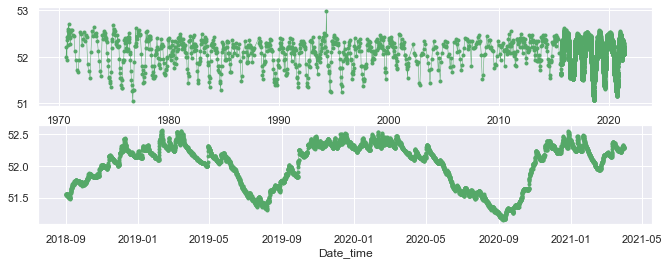

In [19]:
import seaborn as sns
sns.set(rc={'figure.figsize': (11,4)})

fig, axes = plt.subplots(nrows=2, ncols=1)
gvts_masl['Grundvattennivå (m ö.h.)'].plot(kind='line', linewidth=0.5, marker='.', color='g', ax= axes[0], subplots=True)
gvts_masl.loc['2018-09':'2021-03','Grundvattennivå (m ö.h.)'].plot(kind='line', linewidth=0.5, marker='.', color='g', ax= axes[1], subplots=True)


<AxesSubplot:xlabel='Date_time'>

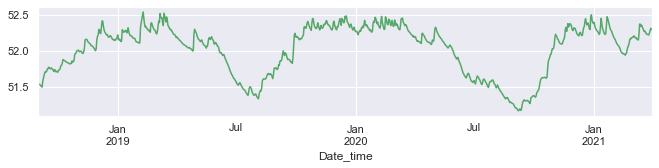

In [22]:
gvts_masl_agg = gvts_masl.resample('D').mean()
gvts_masl_agg.tail()
sns.set(rc={'figure.figsize': (11,2)})
gvts_masl_agg.loc['2018-09': '2021-03', 'Grundvattennivå (m ö.h.)'].plot(kind='line', color='g')

In [12]:
precip=pd.read_csv("smhi-opendata_5_72360_20210511_203336.csv", skiprows=9, sep=";", index_col=2, parse_dates=['Representativt dygn'])
precip.index.names = ['Date_time']
precip=precip.rename(columns={'Nederbördsmängd':'Precip'})[['Precip']]
#precip.head()


Precip    float64
dtype: object

<AxesSubplot:xlabel='Date', ylabel='Precipitation (mm)'>

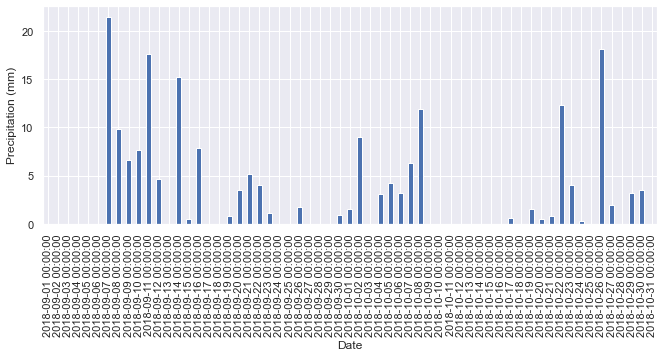

In [20]:
sns.set(rc={'figure.figsize': (11,2)})
precip.loc['2018-09':'2018-10', 'Precip'].plot(kind='bar', color='b', xlabel='Date', ylabel='Precipitation (mm)')


In [32]:
df_pg = precip.merge(gvts_masl_agg, how='inner', left_index=True, right_index=True)

df_pg.head()

,Precip,Grundvattennivå (m ö.h.)
Date_time,,
1994-03-01,0.0,NaN
1994-03-02,5.0,NaN
1994-03-03,4.6,NaN
1994-03-04,0.1,NaN
1994-03-05,10.2,NaN


array([<AxesSubplot:title={'center':'Precip'}, xlabel='Date_time'>],
      dtype=object)

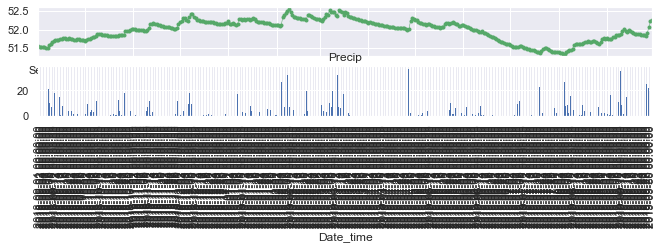

In [34]:
sns.set(rc={'figure.figsize': (11,4)})
fig, axes = plt.subplots(nrows=2, ncols=1)
df_pg.loc['2018-09':'2019-09','Grundvattennivå (m ö.h.)'].plot(kind='line', linewidth=0.5, marker='.', color='g', ax= axes[0], subplots=True)
df_pg.loc['2018-09':'2019-09','Precip'].plot(kind='bar', color='b', ax= axes[1], subplots=True, edgecolor='none')


# Correlation analysis

In [50]:
df_pg.corr(method='pearson')


,Precip,Grundvattennivå (m ö.h.)
Precip,1.000000,0.041561
Grundvattennivå (m ö.h.),0.041561,1.000000


<AxesSubplot:xlabel='Precip', ylabel='Grundvattennivå (m ö.h.)'>

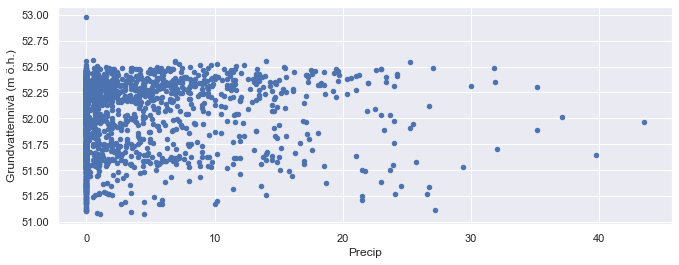

In [64]:
sns.set(rc={'figure.figsize': (11,4)})

df_pg.plot.scatter(x='Precip', y='Grundvattennivå (m ö.h.)', marker='o', color='b')

#sns.lmplot(x='Precip', y='Grundvattennivå (m ö.h.)', data=df_pg, fit_reg=True)

In [61]:
precip_agg = precip

precip_agg['3M'] = precip.rolling('90D').sum()
precip_agg['4M'] = precip['Precip'].rolling('120D').sum()
precip_agg['5M'] = precip['Precip'].rolling('150D').sum()
precip_agg['6M'] = precip['Precip'].rolling('180D').sum()
precip_agg.head()

,Precip,3M,4M,5M,6M
Date_time,,,,,
1994-03-01,0.0,0.0,0.0,0.0,0.0
1994-03-02,5.0,5.0,5.0,5.0,5.0
1994-03-03,4.6,9.6,9.6,9.6,9.6
1994-03-04,0.1,9.7,9.7,9.7,9.7
1994-03-05,10.2,19.9,19.9,19.9,19.9


In [62]:
df_pg_agg = precip_agg.merge(gvts_masl_agg, how='inner', left_index=True, right_index=True)

df_pg_agg.corr(method='pearson')

,Precip,3M,4M,5M,6M,Grundvattennivå (m ö.h.)
Precip,1.000000,0.137491,0.112605,0.090198,0.078874,0.041561
3M,0.137491,1.000000,0.907777,0.812668,0.727552,0.560733
4M,0.112605,0.907777,1.000000,0.927888,0.845102,0.631742
5M,0.090198,0.812668,0.927888,1.000000,0.940114,0.651191
6M,0.078874,0.727552,0.845102,0.940114,1.000000,0.627951
Grundvattennivå (m ö.h.),0.041561,0.560733,0.631742,0.651191,0.627951,1.000000


<AxesSubplot:xlabel='5M', ylabel='Grundvattennivå (m ö.h.)'>

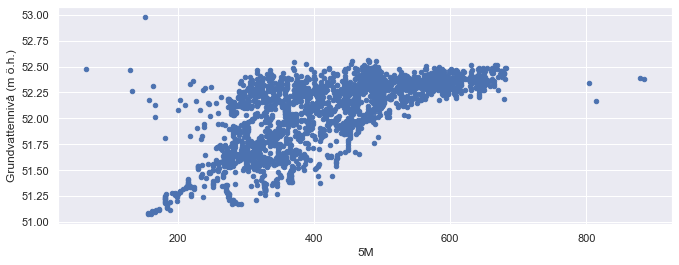

In [65]:
#sns.lmplot(x='5M', y='Grundvattennivå (m ö.h.)', data=df_pg_agg, fit_reg=True)
df_pg_agg.plot.scatter(x='5M', y='Grundvattennivå (m ö.h.)', marker='o', color='b')

# Extreme value analysis

In [68]:
gvts_masl_agg['water_year'] = gvts_masl_agg.index.year.where(gvts_masl_agg.index.month < 10, gvts_masl_agg.index.year + 1)
gvts_masl_agg.head(53)

,Grundvattennivå (m ö.h.),water_year
Date_time,,
1970-08-13,51.99,1970
1970-08-14,NaN,1970
1970-08-15,NaN,1970
1970-08-16,NaN,1970
1970-08-17,NaN,1970
1970-08-18,NaN,1970
1970-08-19,NaN,1970
1970-08-20,NaN,1970
1970-08-21,52.21,1970


In [70]:
idx = gvts_masl_agg.groupby(['water_year'])['Grundvattennivå (m ö.h.)'].transform(max) == gvts_masl_agg['Grundvattennivå (m ö.h.)']
gvts_masl_agg_max = gvts_masl_agg[idx]
gvts_masl_agg_max.head()
#gvts_masl_agg_max.shape

(55, 2)

In [71]:
gvts_masl_agg_max['rank'] = gvts_masl_agg_max['Grundvattennivå (m ö.h.)'].rank(method ='dense', ascending=False)

gvts_masl_agg_max.head()


<ipython-input-71-1d0ee664100c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gvts_masl_agg_max['rank'] = gvts_masl_agg_max['Grundvattennivå (m ö.h.)'].rank(method ='dense', ascending=False)


,Grundvattennivå (m ö.h.),water_year,rank
Date_time,,,
1970-09-16,52.43,1970,21.0
1970-11-05,52.71,1971,2.0
1971-11-09,52.54,1972,9.0
1972-03-28,52.54,1972,9.0
1973-02-17,52.64,1973,4.0


Weibull plotting positions

$T=\frac{n+0.12}{r-0.44}$

In [74]:
nyear=gvts_masl_agg_max.shape[0]
gvts_masl_agg_max['Return Period'] = (nyear+0.12) / (gvts_masl_agg_max['rank']-0.44)
gvts_masl_agg_max.head()

<ipython-input-74-89dad050a572>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gvts_masl_agg_max['Return Period'] = (nyear+0.12) / (gvts_masl_agg_max['rank']-0.44)


,Grundvattennivå (m ö.h.),water_year,rank,Return Period
Date_time,,,,
1970-09-16,52.43,1970,21.0,2.680934
1970-11-05,52.71,1971,2.0,35.333333
1971-11-09,52.54,1972,9.0,6.439252
1972-03-28,52.54,1972,9.0,6.439252
1973-02-17,52.64,1973,4.0,15.483146


<AxesSubplot:xlabel='Return Period', ylabel='Grundvattennivå (m ö.h.)'>

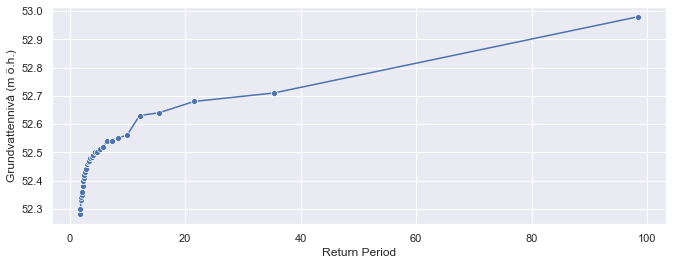

In [77]:
sns.lineplot(x='Return Period', y='Grundvattennivå (m ö.h.)', data=gvts_masl_agg_max, marker='o')

In [88]:
from scipy.stats import norm
import numpy as np 

mean_max_gv = gvts_masl_agg_max['Grundvattennivå (m ö.h.)'].mean()
sd_max_gv = gvts_masl_agg_max['Grundvattennivå (m ö.h.)'].std()

probs = np.linspace(0.01,.99, num=100)
#probs
rl = norm.ppf(probs, loc=mean_max_gv, scale=sd_max_gv)

1/(1-probs)

d = {'Return Period': 1/(1-probs), 'Grundvattennivå (m ö.h.)': rl}
normal_gv = pd.DataFrame(d)

normal_gv.head()

,Return Period,Grundvattennivå (m ö.h.)
0,1.010101,52.191481
1,1.020303,52.223159
2,1.030713,52.243309
3,1.041338,52.258481
4,1.052184,52.270827


<AxesSubplot:xlabel='Return Period', ylabel='Grundvattennivå (m ö.h.)'>

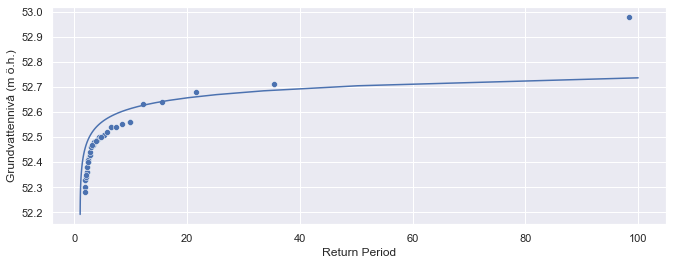

In [89]:
ax=sns.scatterplot(x='Return Period', y='Grundvattennivå (m ö.h.)', data=gvts_masl_agg_max)
sns.lineplot(x='Return Period', y='Grundvattennivå (m ö.h.)', data=normal_gv, ax= ax)

# Getting started with the Varnum data set

In [3]:
gv_ref=pd.read_csv("varnum_ref.csv", sep=";", encoding="latin1", index_col=2, parse_dates=['Datum för mätning'])
gv_ref.index.names = ['Date_time']

B1=pd.read_csv("B1.csv", sep=";", decimal=",", index_col=3, parse_dates=['Date_time'])
R2=pd.read_csv("R2.csv", sep=";", decimal=",", index_col=3, parse_dates=['Date_time'])
R2.head()

,Timestamp,Date,Time,ms,LEVEL,TEMPERATURE,CONDUCTIVITY,relative level
Date_time,,,,,,,,
2018-09-13 12:00:00,43356.50,2018-09-13,12:00:00,0,NaN,16.6,0.0,NaN
2018-09-13 13:00:00,43356.54,2018-09-13,13:00:00,0,6.674,6.7,24.0,0.000
2018-09-13 14:00:00,43356.58,2018-09-13,14:00:00,0,6.675,6.7,24.0,0.001
2018-09-13 15:00:00,43356.63,2018-09-13,15:00:00,0,6.677,6.7,24.0,0.003
2018-09-13 16:00:00,43356.67,2018-09-13,16:00:00,0,6.679,6.7,24.0,0.005


<AxesSubplot:label='fd1b5139-b3c6-4aec-845e-af439fc81784'>

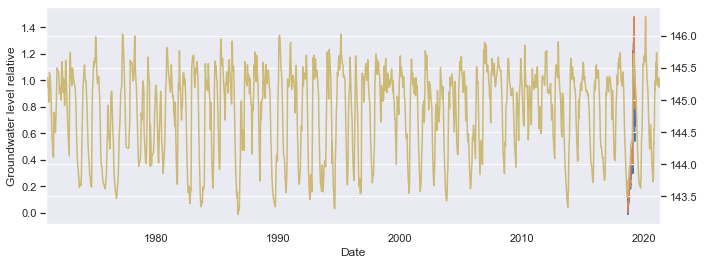

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize': (11,4)})

ax = B1['relative level'].plot()
R2['relative level'].plot(ax=ax, xlabel='Date', ylabel='Groundwater level relative')
gv_ref['Grundvattennivå (m ö.h.)'].plot(ax=ax, xlabel='Date', color='y', secondary_y=True) # , secondary_y=True
# add secondary axis

<AxesSubplot:label='45ad8028-595f-4e1b-a404-80d1ecd35dd2'>

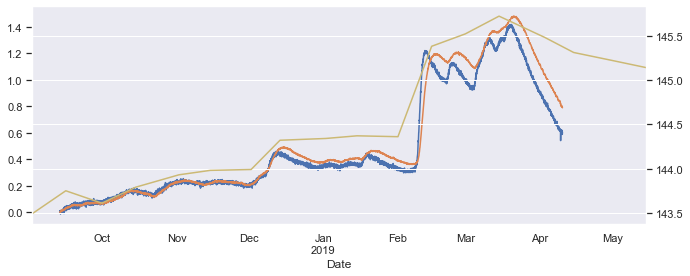

In [102]:
gv_ref_rp=gv_ref.loc['2018-09':'2019-05','Grundvattennivå (m ö.h.)']

ax = B1['relative level'].plot()
R2['relative level'].plot(ax=ax)

gv_ref_rp.plot(ax=ax, xlabel='Date', color='y', secondary_y=True) #marker='o',

In [10]:
import statsmodels.formula.api as sm
# Alternative: from pandas.stats.api import ols (res = ols(y=fv_varnum_merge['gvobs'], x=fv_varnum_merge['gvref']))

fv_varnum_merge = gv_ref.merge(B1, how='inner', left_index=True, right_index=True)
fv_varnum_merge = fv_varnum_merge.rename(columns={'Grundvattennivå (m ö.h.)': 'gvref', 'relative level': 'B1_obs'})[['gvref', 'B1_obs']]

fv_varnum_merge.head()

# check that correlation is high in order to use this as a reference well
fv_varnum_merge.corr(method ='pearson')

# carry out regression analysis:
result = sm.ols(formula="B1_obs ~ gvref", data=fv_varnum_merge).fit()
#print(result.params)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 B1_obs   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     237.8
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.83e-09
Time:                        11:08:58   Log-Likelihood:                 14.446
No. Observations:                  14   AIC:                            -24.89
Df Residuals:                      12   BIC:                            -23.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -77.6270      5.065    -15.326      0.0

C:\Users\ezra\Miniconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
ref_reg_df=gv_ref.rename(columns={'Grundvattennivå (m ö.h.)': 'gvref'})[['gvref']]
ref_reg_df.head()
pred_obs=result.predict(ref_reg_df).to_frame(name='B1_pred')
print(pred_obs)
#pred_obs.__class__

                      B1_pred
Date_time                    
1970-12-22 00:00:00  1.016015
1970-12-30 00:00:00  0.940329
1971-01-16 00:00:00  0.875456
1971-01-30 00:00:00  0.951141
1971-02-17 00:00:00  0.902486
...                       ...
2021-05-02 08:00:00  0.864643
2021-05-02 12:00:00  0.870049
2021-05-02 16:00:00  0.870049
2021-05-02 20:00:00  0.864643
2021-05-03 00:00:00  0.864643

[2439 rows x 1 columns]


<AxesSubplot:xlabel='Date'>

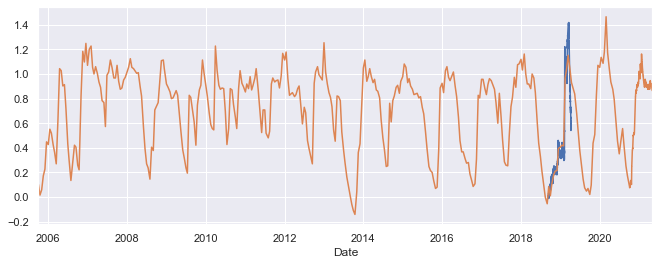

In [109]:
ax = B1['relative level'].plot()
# R2['relative level'].plot(ax=ax, xlabel='Date', ylabel='Groundwater level relative')
pred_obs.loc['2005-10':'2021-05', 'B1_pred'].plot(ax=ax, xlabel='Date') # 